In [49]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [50]:
data=pd.read_csv(filepath_or_buffer="final.csv",delimiter=";",index_col=False).round(2)

# Final data
The final dataset contains 21 columns
* gameid: ID of the game on transfermarkt
* tournament: tournament during which the game took place
* gametype: which round of the tournament the game took place in
* teamA: The first team
* teamidA: ID of the first team on transfermarkt
* teamB: The second team
* teamidB: ID of the second team on transfermarkt
* resultA: Number of goals scored by the first team in that game
* resultB: Number of goals scored by the second team in that game
* addinfo: If the game was decided in extra time or penalties
* date: Date of the game
* teamA_age: Average age of the first team
* teamB_age: Average age of second team
* teamA_def_val: Average market value of defense players in first team
* teamA_off_val: Average market value of offense players in first team
* teamB_def_val: Average market value of defense players in second team
* teamB_off_val: Average market value of offense players in second team
* teamA_frag: Number of clubs the first team's players are from
* teamB_frag: Number of clubs the second team's players are from
* past_resultA: Weighted moving average of goals scored by the first team in past encounters against the second team
* past_resultB: Weighted moving average of goals scored by the second team in past encounters against the first team

Target variables are
* resultA
* resultB

Possible predictor variables are
* gametype
* teamA_age, teamB_age
* teamA_def_val, teamB_def_val
* teamA_off_val, teamB_off_val
* teamA_frag, teamB_frag
* past_resultA, past_resultB

In [51]:
data.head()

,gameid,tournament,gametype,teamA,teamidA,teamB,teamidB,resultA,resultB,addinfo,...,teamA_age,teamB_age,teamA_def_val,teamB_def_val,teamA_off_val,teamB_off_val,teamA_frag,teamB_frag,past_resultA,past_resultB
0,910204,EM08,Finale,Deutschland,3262,Spanien,3375,0,1,NaN,...,26.78,26.09,9583333.33,13083333.33,10854545.45,20363636.36,13,11,1.14,2.90
1,910203,EM08,Halbfinale,Russland,3448,Spanien,3375,0,3,NaN,...,25.76,26.09,4735000.00,13769230.77,6318181.82,20200000.00,10,11,0.95,3.80
2,910200,EM08,Halbfinale,Deutschland,3262,Türkei,3381,3,2,NaN,...,26.78,26.38,9772727.27,3628571.43,10575000.00,4577777.78,13,9,0.95,1.90
3,910151,EM08,Viertelfinale,Spanien,3375,Italien,3376,4,2,n.E.,...,26.04,28.75,13769230.77,13580000.00,20200000.00,14300000.00,11,13,1.00,0.05
4,910149,EM08,Viertelfinale,Niederlande,3379,Russland,3448,1,3,n.V.,...,27.74,25.70,5438461.54,4668181.82,16150000.00,6208333.33,15,10,3.80,0.95


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 21 columns):
gameid           566 non-null int64
tournament       566 non-null object
gametype         566 non-null object
teamA            566 non-null object
teamidA          566 non-null int64
teamB            566 non-null object
teamidB          566 non-null int64
resultA          566 non-null int64
resultB          566 non-null int64
addinfo          57 non-null object
date             566 non-null object
teamA_age        566 non-null float64
teamB_age        566 non-null float64
teamA_def_val    566 non-null float64
teamB_def_val    566 non-null float64
teamA_off_val    566 non-null float64
teamB_off_val    566 non-null float64
teamA_frag       566 non-null int64
teamB_frag       566 non-null int64
past_resultA     439 non-null float64
past_resultB     439 non-null float64
dtypes: float64(8), int64(7), object(6)
memory usage: 92.9+ KB


In [53]:
data.isnull().sum()

gameid             0
tournament         0
gametype           0
teamA              0
teamidA            0
teamB              0
teamidB            0
resultA            0
resultB            0
addinfo          509
date               0
teamA_age          0
teamB_age          0
teamA_def_val      0
teamB_def_val      0
teamA_off_val      0
teamB_off_val      0
teamA_frag         0
teamB_frag         0
past_resultA     127
past_resultB     127
dtype: int64

The column `addinfo` is almost always N/A, because most games are decided in regular time.
The columns `past_resultA` `past_resultB` are N/A if certain teams have never played against each other before.

In [54]:
print(data.addinfo.value_counts())
data[data.past_resultA.isnull()].head(5)

n.E.    35
n.V.    22
Name: addinfo, dtype: int64


,gameid,tournament,gametype,teamA,teamidA,teamB,teamidB,resultA,resultB,addinfo,...,teamA_age,teamB_age,teamA_def_val,teamB_def_val,teamA_off_val,teamB_off_val,teamA_frag,teamB_frag,past_resultA,past_resultB
59,2532170,AC15,Halbfinale,Ghana,3441,Äquatorialguinea,13485,3,0,NaN,...,24.39,24.82,1800000.00,85416.67,3790000.00,487500.00,23,19,NaN,NaN
66,2515892,AC15,Gruppe A,Gabun,5704,Äquatorialguinea,13485,0,2,NaN,...,23.82,24.95,915909.09,102272.73,2268181.82,434090.91,21,19,NaN,NaN
67,2515885,AC15,Gruppe A,Äquatorialguinea,13485,Burkina Faso,5872,0,0,NaN,...,24.61,26.17,100000.00,1057692.31,434090.91,1380000.00,19,23,NaN,NaN
69,2515876,AC15,Gruppe A,Äquatorialguinea,13485,Kongo,3702,1,1,NaN,...,24.61,24.35,101785.71,513636.36,505555.56,816666.67,19,18,NaN,NaN
75,2515878,AC15,Gruppe B,Sambia,3703,Demokratische-Republik-Kongo,3854,1,1,NaN,...,23.77,25.91,397222.22,1257692.31,421153.85,2260000.00,13,18,NaN,NaN


We impute the missing values in columns `past_resultA` and `past_resultB` with zero. There are a total of five pairs which had a moving average of zero goals on each side in past encounters. These teams only had one previous encounter in the past 15 years (Northern Ireland and Ukraine had 2 encounters). We therefore think that the imputation roughly encodes the same information, namely that both teams had almost no encounters in the past.

In [55]:
data[(data.past_resultA==0) & (data.past_resultB==0)]

,gameid,tournament,gametype,teamA,teamidA,teamB,teamidB,resultA,resultB,addinfo,...,teamA_age,teamB_age,teamA_def_val,teamB_def_val,teamA_off_val,teamB_off_val,teamA_frag,teamB_frag,past_resultA,past_resultB
130,2384320,WM14,Gruppe E,Honduras,3590,Schweiz,3384,0,3,NaN,...,28.09,25.61,1050000.00,8000000.00,711111.11,7400000.00,16,16,0.0,0.0
155,2529903,AM15,Halbfinale,Australien,3433,Vereinigte-Arabische-Emirate,5147,2,0,NaN,...,26.55,25.26,1477272.73,119642.86,1127272.73,255555.56,21,5,0.0,0.0
280,2817763,AC17,Viertelfinale,Ägypten,3672,Marokko,3575,1,0,NaN,...,27.24,26.83,1076923.08,2644444.44,5337500.00,2339285.71,14,23,0.0,0.0
425,2645650,EM16,Gruppe C,Ukraine,3699,Nordirland,5674,0,2,NaN,...,27.43,28.00,3841666.67,1561538.46,7045454.55,1780000.00,10,22,0.0,0.0
467,986776,WM10,Gruppe A,Uruguay,3449,Frankreich,3377,0,0,NaN,...,26.70,27.48,4918750.00,14192307.69,6452272.73,18300000.00,20,11,0.0,0.0


In [56]:
data.fillna({"past_resultA":0,"past_resultB":0},inplace=True)

Mean of Nb 5.108108108108109 Variance of Nb 13.805697589481376


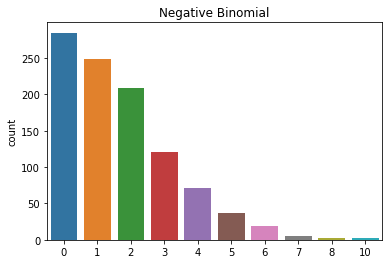

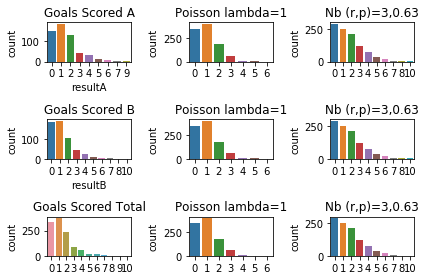

In [57]:
goals = np.concatenate([data.resultA, data.resultB], axis=0)
lam1=1
lam2=2
lambda1 = np.random.poisson(lam1, 1000)
lambda2 = np.random.poisson(lam2, 1000)

nb_r = 3
nb_p = 0.63
nb_mean = nb_r*nb_p/(1-nb_p)
nb_var = nb_mean/(1-nb_p)
print("Mean of Nb",nb_mean,"Variance of Nb",nb_var)
nb=np.random.negative_binomial(nb_r, nb_p,1000)

plt.figure()
sns.countplot(nb)
plt.title("Negative Binomial")
plt.show()

plt.figure()

plt.subplot(331)
plt.title("Goals Scored A")
sns.countplot(data.resultA)

plt.subplot(334)
plt.title("Goals Scored B")
sns.countplot(data.resultB)

plt.subplot(337)
plt.title("Goals Scored Total")
sns.countplot(goals)

plt.subplot(332)
plt.title("Poisson lambda={lam}".format(lam=lam1))
sns.countplot(lambda1)

plt.subplot(335)
plt.title("Poisson lambda={lam}".format(lam=lam1))
sns.countplot(lambda1)

plt.subplot(338)
plt.title("Poisson lambda={lam}".format(lam=lam1))
sns.countplot(lambda1)

plt.subplot(333)
plt.title("Nb (r,p)={r},{p}".format(r=nb_r, p=nb_p))
sns.countplot(nb)

plt.subplot(336)
plt.title("Nb (r,p)={r},{p}".format(r=nb_r, p=nb_p))
sns.countplot(nb)

plt.subplot(339)
plt.title("Nb (r,p)={r},{p}".format(r=nb_r, p=nb_p))
sns.countplot(nb)

plt.tight_layout()


We can see from these pictures that a negative binomial distribution describes the number of goals better than a poisson distribution. The poisson distribution suffers from overdispersion, because the variance of the dataset is higher than its mean.

In [58]:
# Encode round
rounds = {
    "Finale": 1,
    "Spiel um Platz Drei": 2,
    "Halbfinale": 3,
    "Viertelfinale": 4,
    "Achtelfinale": 5,
    "Gruppenphase": 6
}
def map_to_round(x):
    if x.startswith("Gruppe"):
        return rounds["Gruppenphase"]
    else:
        return rounds[x]
data["gametype"]=data["gametype"].apply(map_to_round)

Correlations for resultA:
 [-0.22438974 -0.01330955  0.06886065  0.20312232 -0.16689948  0.18097588
 -0.1866926   0.03639338 -0.08187602  0.10606316 -0.0181755   1.        ]
p-Values for resultA:
 [6.83130469e-08 7.52034153e-01 1.01720733e-01 1.10119115e-06
 6.60998034e-05 1.47858955e-05 7.78156513e-06 3.87479054e-01
 5.15520250e-02 1.15741214e-02 6.66113108e-01 0.00000000e+00]
Correlations for resultB:
 [-0.21410116 -0.05751959 -0.00550365 -0.12984285  0.19026676 -0.0907476
  0.1674267  -0.022517   -0.0010454  -0.00711336  0.12616896  1.        ]
p-Values for resultB:
 [2.71667179e-07 1.71769294e-01 8.96054226e-01 1.96585243e-03
 5.15724533e-06 3.08783678e-02 6.26265383e-05 5.92940298e-01
 9.80201809e-01 8.65906622e-01 2.63801921e-03 0.00000000e+00]


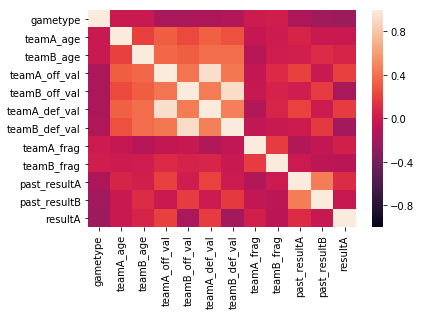

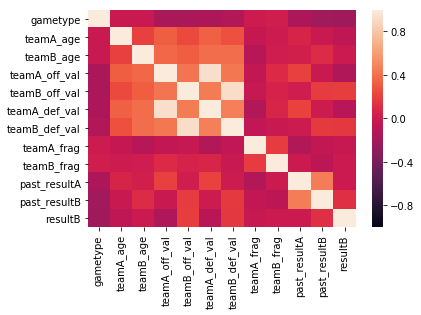

,gametype,teamA_age,teamB_age,teamA_off_val,teamB_off_val,teamA_def_val,teamB_def_val,teamA_frag,teamB_frag,past_resultA,past_resultB,resultA
0,1,26.78,26.09,10854545.45,20363636.36,9583333.33,13083333.33,13,11,1.14,2.90,0
1,3,25.76,26.09,6318181.82,20200000.00,4735000.00,13769230.77,10,11,0.95,3.80,0
2,3,26.78,26.38,10575000.00,4577777.78,9772727.27,3628571.43,13,9,0.95,1.90,3
3,4,26.04,28.75,20200000.00,14300000.00,13769230.77,13580000.00,11,13,1.00,0.05,4
4,4,27.74,25.70,16150000.00,6208333.33,5438461.54,4668181.82,15,10,3.80,0.95,1


In [59]:
# correlation heatmap
# spearman correlation
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html

# significance level 0.05

# viewpoint team A
labels_A = ["gametype","teamA_age","teamB_age","teamA_off_val","teamB_off_val","teamA_def_val","teamB_def_val","teamA_frag","teamB_frag","past_resultA","past_resultB","resultA"]
encoded_dataA = data[labels_A]
corrA, p_valueA = sp.stats.spearmanr(encoded_dataA)
print("Correlations for resultA:\n",corrA[:,-1])
print("p-Values for resultA:\n",p_valueA[:,-1])

# viewpoint team B
labels_B = ["gametype","teamA_age","teamB_age","teamA_off_val","teamB_off_val","teamA_def_val","teamB_def_val","teamA_frag","teamB_frag","past_resultA","past_resultB","resultB"]
encoded_dataB = data[labels_B]
corrB, p_valueB = sp.stats.spearmanr(encoded_dataB)
print("Correlations for resultB:\n", corrB[:,-1])
print("p-Values for resultB:\n",p_valueB[:,-1])



plt.figure()
sns.heatmap(data=corrA,vmin=-1,vmax=1,xticklabels=labels_A,yticklabels=labels_A)
plt.figure()
sns.heatmap(data=corrB,vmin=-1,vmax=1,xticklabels=labels_B,yticklabels=labels_B)
plt.show()
encoded_dataA.head()

What we can see from this correlation heatmap is that a team's offence market value is closely correlated to a team's defence market value. Perhaps it is already enough to consider the whole team's market value to remove redundancy. Other than that, the heatmap and the p-values imply the following relationships:
* The further the tournament progresses, the less goals are scored
* There's no clear relationship between the number of goals scored and both team's ages
* The larger the offence market value of a team is, the more goals are scored (same for defence)
* The smaller the offence market value of the opponent team is, the more goals are scored (same for defence)
* There's no clear relationship between the number of goals scored and the fragmentation of both teams
* The more goals a team scored against the other team in the past, the more goals it scores in the actual game

It looks like out of all the features we have gathered, three to four might turn out to be useful.
